# Dataset & DataLoader
## Code Flow
1. Load the dataset
2. Basic Preprocessing
3. Training Process: Create the model, Forward Pass, Loss Calculation, Backpropagation, Parameter Update
4. Model Evaluation
# Improvements
1. Build NN using NN Module
2. Using built-in AF
3. Using built-in Loss Function
4. Using built-in optimizer
# The NN Module

`nn.Module` is the fundamental base class for all neural network modules in PyTorch. Think of it as the building block for every part of your neural network, from a single layer (like Linear or Convolutional) to the entire, complex model itself (like a Transformer or a ResNet).

Your models are `nn.Module`: Any class you create for your neural network should inherit from `nn.Module`.

PyTorch's layers are `nn.Module`: Built-in layers like `nn.Linear`, `nn.Conv2d`, `nn.ReLU` are all subclasses of `nn.Module`.
# Batch Gradient Descent
Batch Gradient Descent is an optimization algorithm where you use the entire training dataset to compute the gradient of the loss function in each iteration.

It is usually avoided because it is memory inefficient and it doesn't have better convergence. We were previously using Batch Gradient Descent, We need to fix it.

So instead of loading dataset in one we can divide them in batches. This is called **Mini Batch Gradient Descent**.

Our current approach uses Batch GD (entire dataset at once), which is inefficient. With DataLoader, we can easily implement Mini-Batch GD by:

- Creating batches of optimal size
- Processing one batch per iteration
- Updating parameters after each batch
# Dataset and DataLoader
Dataset and DataLoader are core abstraction in pytorch that decouple how you define your data from how you efficiently iterate over it in training loops.

Dataset Class job is to load the data and DataLoader Class job is to create batches from loaded Data.

Eg: There is CSV dataset with 10 rows and batch size is 2 meaning total batches will be 10/2 = 5 batches.

Dataset class is essentially a blueprint that defines how to access and preprocess your raw data. It defines:

- `__init__(self, ...)`: Initializes the dataset - sets up data paths, parameters, and preprocessing rules.

- `__getitem__(self, index)`: Retrieves and returns the single data sample at the given index, including any transformations.

- `__len__(self)`: Returns the total number of samples in the dataset.

```python
import torch
from torch.utils.data import Dataset

class SimpleDataset(Dataset):
    def __init__(self, data):  # Setup data
        self.data = data
    
    def __getitem__(self, index):  # Get one sample
        return self.data[index]
    
    def __len__(self):  # Total samples
        return len(self.data)

# Example data: 10 numbers
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dataset = SimpleDataset(data)

# Test the dataset
print(f"Total samples: {len(dataset)}")  # Output: Total samples: 10
print(f"Sample at index 0: {dataset[0]}")  # Output: Sample at index 0: 10
print(f"Sample at index 5: {dataset[5]}")  # Output: Sample at index 5: 60
```

The DataLoader is a powerful iterator that works with your Dataset to automatically:

- Create batches from individual samples
- Shuffle data randomly each epoch
- Load data in parallel using multiple workers
- Manage memory efficiently
## Features:
- Batching: Groups individual samples into mini-batches for efficient processing
- Shuffling: Randomizes data order to prevent learning sequence patterns
- Parallel Loading: Uses multiple workers to load next batch while current one processes
- Automatic Batching: Handles different batch sizes and dataset lengths

```python
import torch
from torch.utils.data import Dataset, DataLoader

# Same Simple Dataset from before
class SimpleDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return len(self.data)

# Create dataset with 10 samples
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
dataset = SimpleDataset(data)

# Create DataLoader with batch_size=2
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate through batches
print("Batches with batch_size=2:")
for batch_idx, batch in enumerate(dataloader):
    print(f"Batch {batch_idx}: {batch}")

# Output will look like (order changes due to shuffle=True):
# Batch 0: tensor([20, 90])  
# Batch 1: tensor([40, 30])
# Batch 2: tensor([10, 70])
# Batch 3: tensor([60, 80])
# Batch 4: tensor([100, 50])
```

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Splitting Training and Test Data

In [ ]:
# Split the dataset into training and testing sets
# X: All columns except the first column (features)
# y: Only the first column (target variable)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],  # All features (exclude first column)
                                                    df.iloc[:, 0],   # Target variable (only first column)
                                                    test_size=0.2)   # 20% of data for testing

In [ ]:
scaler = StandardScaler() # Initialize the StandardScaler for feature standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.25474357,  1.46442596, -0.31832256, ..., -0.83612659,
        -0.74813537, -0.8700092 ],
       [ 0.03099716,  2.09232446,  0.03034563, ..., -0.49023362,
        -1.6576153 , -0.31702606],
       [-0.38488291, -0.6003941 , -0.38392994, ..., -0.51741762,
         0.28118578,  0.10045426],
       ...,
       [ 1.07494102,  0.4428834 ,  1.34455647, ...,  1.2940679 ,
         0.56683471,  1.97829283],
       [ 1.57569457,  0.60227302,  1.57150025, ...,  1.74869687,
         1.88016313, -0.25009755],
       [-0.7866174 , -1.21380263, -0.82626401, ..., -1.60071564,
        -0.23265396, -1.09054414]])

In [ ]:
y_train

,diagnosis
457,B
238,B
519,B
491,B
172,M
...,...
366,M
493,B
400,M
343,M


## Need to Encode the Label that are being represented by Alphabets currently

In [ ]:
# Initialize LabelEncoder for converting categorical labels to numerical values
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

## Converting Numpy Arrays to PyTorch Tensors
- Using `torch.from_numpy()`

In [ ]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

## Creating Dataset Class

In [68]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.labels[idx]

In [69]:
# Converting to Object
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [65]:
train_dataset[10]

(tensor([-0.4330, -0.1898, -0.4945, -0.4691, -0.8878, -1.2084, -1.1114, -1.2171,
         -0.4394, -0.5953, -0.4823,  0.2447, -0.5711, -0.3841, -0.2429, -0.9531,
         -0.9593, -1.4539,  0.6454, -0.6467, -0.5672, -0.4102, -0.6430, -0.5516,
         -1.2705, -1.2132, -1.2872, -1.6372, -0.6480, -1.0659]),
 tensor(0.))

In [70]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Define the Model
- We have input shape `[455, 30]` (455 samples, 30 features).
- Weight matrix size: `(input_features, output_features)`
- Bias vector size: `(output_features)`

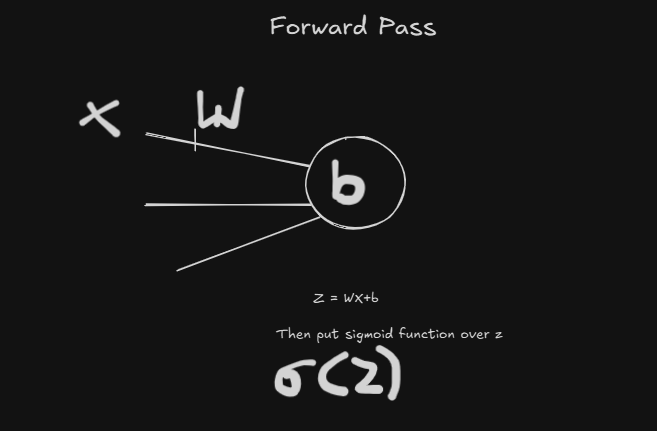

Clamping is an operation that restricts values to stay within a specified range. It "clamps" or "squeezes" values that fall outside the desired range to the minimum or maximum boundaries.

```python
# Syntax: torch.clamp(tensor, min, max)
# - Values < min become min
# - Values > max become max  
# - Values between min and max stay unchanged

Input:  [0.0, 0.3, 0.7, 1.0, 1.2]
Clamp between 0.1 and 0.9

Output: [0.1, 0.3, 0.7, 0.9, 0.9]
# 0.0 → 0.1 (too low)
# 1.2 → 0.9 (too high)
```

# Loss Function
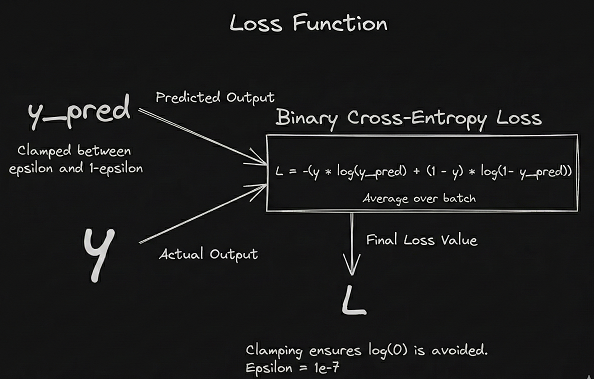

# Formula to Update Parameter in NN

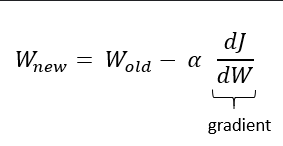

- `W` means weight and for updating Bias (`b`) formula is same just replace `W` with `b`.


In [71]:
import torch.nn as nn

class simpleNN(nn.Module):

    def __init__(self, num_features):
      super().__init__()
      self.linear = nn.Linear(num_features, 1)
      self.sigmoid = nn.Sigmoid()

    def forward(self, features):
      out = self.linear(features)
      out = self.sigmoid(out)
      return out


## Important Parameters

In [72]:
learning_rate = 0.1
# Epochs = number of complete passes through the entire training dataset
# 25 epochs means the model will see the entire dataset 25 times during training
epochs = 25

## Training Pipeline

In [74]:
# Binary Cross-Entropy Loss for binary classification tasks
# Measures the difference between predicted probabilities and actual binary labels (0 or 1)
# Formula: Loss = -[y*log(p) + (1-y)*log(1-p)] where y=actual, p=predicted
loss_function = nn.BCELoss()  # Suitable for models with sigmoid output (probabilities between 0-1)

model = simpleNN(X_train_tensor.shape[1])

# Define optimizer OUTSIDE the loop (create once)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    for batch_features, batch_labels in train_loader:
        # Convert to Float32 to match model dtype
        batch_features = batch_features.float()
        batch_labels = batch_labels.float()

        # Forward pass
        y_pred = model(batch_features)

        # Loss calculate
        loss = loss_function(y_pred, batch_labels.view(-1, 1))

        # Clear gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Parameters update
        optimizer.step()

    # Print loss in each epoch
    print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.19664214551448822
Epoch: 2, Loss: 0.16812755167484283
Epoch: 3, Loss: 0.046039849519729614
Epoch: 4, Loss: 0.06512156873941422
Epoch: 5, Loss: 0.1804877370595932
Epoch: 6, Loss: 0.1354067474603653
Epoch: 7, Loss: 0.1310201734304428
Epoch: 8, Loss: 0.01279923040419817
Epoch: 9, Loss: 0.19144389033317566
Epoch: 10, Loss: 0.14590145647525787
Epoch: 11, Loss: 0.053379856050014496
Epoch: 12, Loss: 0.08965486288070679
Epoch: 13, Loss: 0.01878231391310692
Epoch: 14, Loss: 0.06927146762609482
Epoch: 15, Loss: 0.15072062611579895
Epoch: 16, Loss: 0.14579884707927704
Epoch: 17, Loss: 0.23285533487796783
Epoch: 18, Loss: 0.012693174183368683
Epoch: 19, Loss: 0.04580700770020485
Epoch: 20, Loss: 0.09438060224056244
Epoch: 21, Loss: 0.020047973841428757
Epoch: 22, Loss: 0.07734035700559616
Epoch: 23, Loss: 0.2944203317165375
Epoch: 24, Loss: 0.19841837882995605
Epoch: 25, Loss: 0.03258183225989342


Loss is the measure of how wrong your model's predictions are.

```
Epoch 1:  Loss: 3.80  ← Starting point (random predictions)
Epoch 25: Loss: 0.77  ← Much better predictions!
```

In [ ]:
model.linear.weight

Parameter containing:
tensor([[ 0.1615,  0.1145,  0.1067,  0.3825,  0.2320,  0.0839,  0.1215,  0.1592,
         -0.0382, -0.1187,  0.1108,  0.0691,  0.2942,  0.2880, -0.1757,  0.0834,
         -0.1514,  0.2391,  0.0372, -0.0837,  0.4138,  0.1815,  0.3499,  0.3055,
          0.1933,  0.0359,  0.2188,  0.1196,  0.3205,  0.1155]],
       requires_grad=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([-0.1048], requires_grad=True)

## Evaluation

Prediction is between 0 to 1 but our original labels are 0 and 1. So we will create a threshold where we will make points which are below 0.5 `0` and that are above 0.5 `1`  

In [76]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Convert to Float32 to match model dtype
        batch_features = batch_features.float()
        batch_labels = batch_labels.float()

        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')

Accuracy: 0.9392
